<b>¡Hola Diego!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


# SPRINT 12 - PROYECTO

# Descripción del ejercicio
Prepara un prototipo de un modelo de machine learning para Zyfra. La empresa desarrolla soluciones de eficiencia para la industria pesada.

El modelo debe predecir la cantidad de oro extraído del mineral de oro. Dispones de los datos de extracción y purificación.

El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.

# 1. PREPARACION DE DATOS

In [1]:
# Importación de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:

train_df = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
test_df = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
full_df = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)


<div class="alert alert-block alert-success">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Has realizado un excelente trabajo al cargar los datasets utilizando `parse_dates=True`. Esto permite que las fechas se manejen correctamente como índices de tiempo, lo cual es crucial para cualquier análisis que dependa del orden temporal de los datos.
</div>


Miramos las filas y las columnas de los dataframe de este proyecto, para explorar las columnas. 

In [5]:
print("Train:")
display(train_df.head())
print("\nTest:")
display(test_df.head())
print("\nFull:")
display(full_df.head())


Train:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



Test:


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



Full:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Proceso de exploración, presenta para el data de Train y Full el mismo número de columnas, mientras que para el de Test tiene apenas 52. Esto debe tenerse presente para la elaboración de los modelos. 

In [6]:
for name, df in zip(['Train', 'Test', 'Full'], [train_df, test_df, full_df]):
    print(f"--- {name} Dataset ---")
    print(df.info())
    print()


--- Train Dataset ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_a

<div class="alert alert-block alert-warning">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Has realizado una buena exploración inicial de los datasets al revisar su estructura y contenido. Sería útil también verificar los tipos de datos para asegurarte de que no haya errores, especialmente en columnas que deberían ser categóricas, ya que esto puede afectar el análisis y modelado posterior.
</div>


Datos a resaltar:
- Hay datos vacíos, que podrían afectar el modelo. Es por ello debemos sacar un análisis de estos mas riguroso. Los vacios
- Los datos son numéricos tipo float.
- Para el TRAIN: 81 nulos para final.output.concentrate_au, y 1963 nulos para final.output.recovery 
- Para el TEST los valores de final.output.concentrate_au y de final.output.recovery no están y deben ser calculados. 

In [7]:
for name, df in zip(['Train', 'Test', 'Full'], [train_df, test_df, full_df]):
    print(f"--- Describe: {name} ---")
    display(df.describe())


--- Describe: Train ---


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


--- Describe: Test ---


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


--- Describe: Full ---


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


El data TRAIN, contiene  las mismas columnas que el data FULL. 
- De los análisis descriptivos, vemos valores negativos que están relacionados a los niveles de los tanques (podría revisar el set point del tanque, o la referencia del nivel, y se debiera verificar que esos valores negativos estén bn)
- La media del final.output.recovery del 67% para los modelos TRAIN. Se esperaría un valor similar para los TEST.  
- Las medias de la salida del concentrado final (final.output.concentrate_au) son similares con el Full.
En el data TEST:
- La columna final.output.recovery no aparece ni tampoco la final.output.concentrate_au. Por lo tanto serán variables a predecir por el modelo. 

Es bueno saber para estos casos, unidades de las variables para notar alguna lógica métrica a los datos. 

Realizamos la detección de los valores vacios en los dataframe: 

In [8]:
for name, df in zip(['Train', 'Test', 'Full'], [train_df, test_df, full_df]):
    print(f"--- Nulos en {name} ---")
    print(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False))
    print()

--- Nulos en Train ---
rougher.output.recovery                               2573
rougher.output.tail_ag                                2250
rougher.output.tail_au                                2249
rougher.output.tail_sol                               2249
secondary_cleaner.output.tail_sol                     1986
                                                      ... 
primary_cleaner.state.floatbank8_b_level                27
primary_cleaner.state.floatbank8_c_level                27
primary_cleaner.state.floatbank8_d_level                27
rougher.calculation.sulfate_to_au_concentrate           27
rougher.calculation.floatbank11_sulfate_to_au_feed      27
Length: 85, dtype: int64

--- Nulos en Test ---
rougher.input.floatbank11_xanthate            353
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
rougher.input.floatbank10_sulfate             257
primary_cleaner.input.xanthate                166
rougher.input.floatbank10_xant

<div class="alert alert-block alert-warning">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
Has identificado correctamente las columnas con valores nulos, lo cual es un paso importante en la limpieza de datos. Considera investigar las razones detrás de los valores nulos en las columnas más afectadas, ya que comprender su origen puede influir significativamente en el análisis y las decisiones de modelado posteriores.
</div>


Se calcula el % de nulos por columna, en TRAIN y TEST, para saber que % corresponde del total:

In [9]:
# Train
porcentaje_nulos_train = train_df.isnull().mean() * 100
print("Porcentaje de nulos en Train (por columna):")
print(porcentaje_nulos_train[porcentaje_nulos_train > 0].sort_values(ascending=False))


Porcentaje de nulos en Train (por columna):
rougher.output.recovery                               15.260973
rougher.output.tail_ag                                13.345196
rougher.output.tail_au                                13.339265
rougher.output.tail_sol                               13.339265
secondary_cleaner.output.tail_sol                     11.779359
                                                        ...    
primary_cleaner.state.floatbank8_b_level               0.160142
primary_cleaner.state.floatbank8_c_level               0.160142
primary_cleaner.state.floatbank8_d_level               0.160142
rougher.calculation.sulfate_to_au_concentrate          0.160142
rougher.calculation.floatbank11_sulfate_to_au_feed     0.160142
Length: 85, dtype: float64


In [10]:
# Test
porcentaje_nulos_test = test_df.isnull().mean() * 100
print("\nPorcentaje de nulos en Test (por columna):")
print(porcentaje_nulos_test[porcentaje_nulos_test > 0].sort_values(ascending=False))


Porcentaje de nulos en Test (por columna):
rougher.input.floatbank11_xanthate            6.028005
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
rougher.input.floatbank10_sulfate             4.388661
primary_cleaner.input.xanthate                2.834699
rougher.input.floatbank10_xanthate            2.100410
rougher.input.feed_sol                        1.144126
rougher.input.floatbank11_sulfate             0.939208
rougher.input.feed_rate                       0.683060
secondary_cleaner.state.floatbank3_a_air      0.580601
secondary_cleaner.state.floatbank2_b_air      0.392760
rougher.input.feed_size                       0.375683
secondary_cleaner.state.floatbank2_a_air      0.341530
rougher.state.floatbank10_f_air               0.290301
rougher.state.floatbank10_e_air               0.290301
rougher.state.floatbank10_d_air               0.290301
rougher.state.floatbank10_b_air               0.290301
rougher.state.floatba

Dado que el porcentaje de los vacios en el TRAIN supera valores del 10%, por lo tanto se debe buscar un tratamiento.
En este caso, dada la importancia del proyecto, y revisando las variables, se decide poner el promedio, como valor deseado para TRAIN y no perder datos.

In [11]:
train_df = train_df.fillna(train_df.mean())

<div class="alert alert-block alert-warning">
<b>Celda [11]</b> <a class="tocSkip"></a><br>
Rellenar los valores nulos con la media es una estrategia común y útil para mantener la consistencia de los datos. Sin embargo, ten en cuenta que esta técnica puede no ser adecuada para todas las columnas, especialmente si tienen una distribución sesgada. Podría ser beneficioso considerar el uso de la mediana o métodos más avanzados para columnas con distribuciones no normales.
</div>


In [12]:
for name, df in zip(['Train', 'Test', 'Full'], [train_df, test_df, full_df]):
    print(f"{name}: {df.duplicated().sum()} duplicados")


Train: 16 duplicados
Test: 6 duplicados
Full: 22 duplicados


Se van a eliminar los duplicados del TRAIN y TEST ya que pueden ser datos que se duplicaron en la recolección de los mismos. 

In [13]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()


<div class="alert alert-block alert-success">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
Bien hecho al eliminar los duplicados de los datasets. Esto es crucial para asegurar que los análisis posteriores no se vean sesgados por datos repetidos, lo que podría llevar a conclusiones incorrectas.
</div>


Vamos a comparar las columnas del conjunto TRAIN y del TEST. Con esto se busca saber que variables X van a ser usadas para el TRAIN y el TEST.

In [14]:
missing_cols = set(train_df.columns) - set(test_df.columns) 
missing_info = train_df[list(missing_cols)].dtypes.to_frame(name='dtypes')
missing_info.index.name = 'column'
display(missing_info)
missing_info.count()

,dtypes
column,
primary_cleaner.output.tail_ag,float64
primary_cleaner.output.tail_pb,float64
primary_cleaner.output.concentrate_pb,float64
primary_cleaner.output.concentrate_sol,float64
final.output.concentrate_ag,float64
rougher.output.recovery,float64
final.output.recovery,float64
rougher.output.tail_sol,float64
rougher.output.concentrate_ag,float64


dtypes    34
dtype: int64

Estas son las columnas que están en el TRAIN pero no en el TEST (corresponde a la resta de las 86 columnas del TRAIN y las 52 del TEST). Vemos columnas de corrientes intermedias que no van a ser tenidas en cuenta en el TRAIN y en el TEST. 

# 2. ANALISIS DE DATOS (GRÁFICAS)

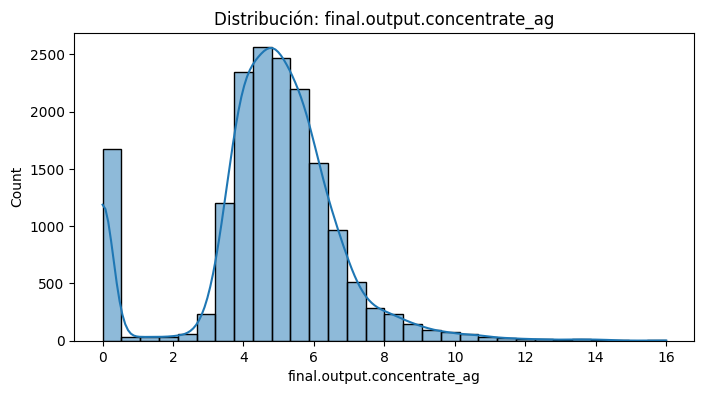

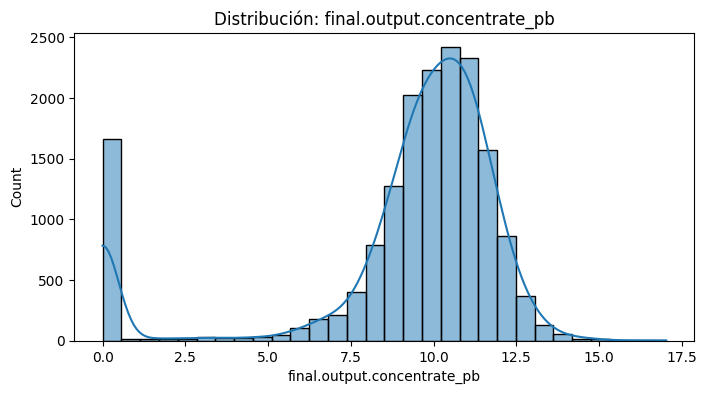

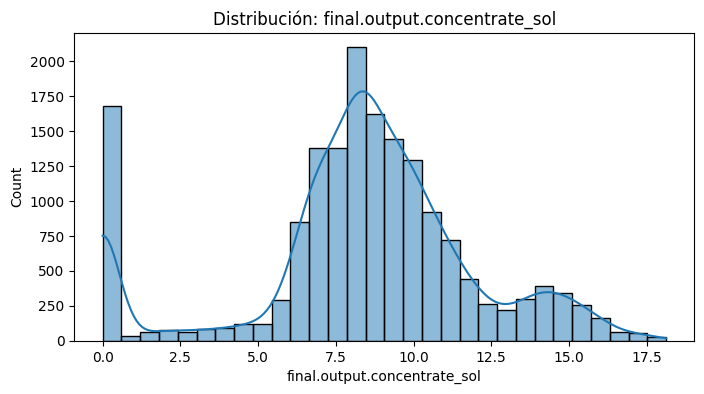

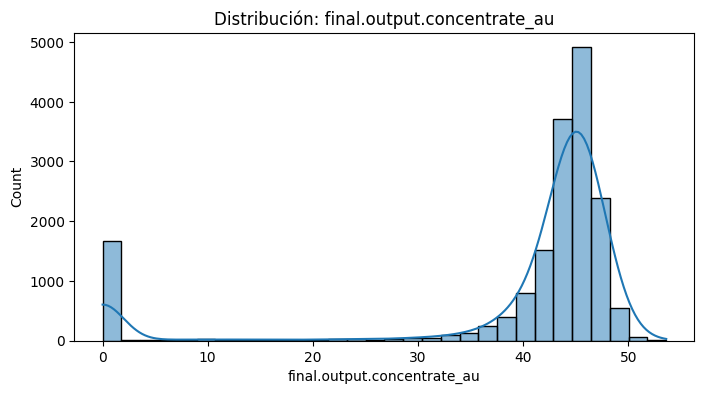

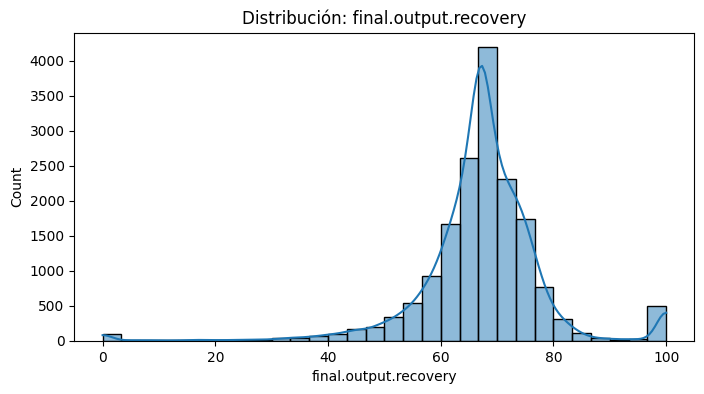

In [15]:
columnas = train_df.select_dtypes(include='number').columns[:5]
for col in columnas:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f'Distribución: {col}')
    plt.show()


<div class="alert alert-block alert-warning">
<b>Celda [15]</b> <a class="tocSkip"></a><br>
Las visualizaciones de distribución que has creado son útiles para comprender la naturaleza de los datos. Considera añadir líneas de referencia o anotaciones para resaltar características importantes como la media o la mediana, ya que esto puede proporcionar una comprensión más profunda de la distribución de los datos.
</div>


Se muestra en algunos casos, la ausencia del metales como Au, Ag, Pb y Sol a la salida de proceso final. Esto es posible en procesos donde el metal no se ha recuperado bien, o fallos en etapas , fallas en el instrumento de medición, o están muy diluidos los compuestos. También puede ser a errores en el registro, y debe verse la base de datos de donde se extrajeron estas líneas. 

Estos datos deben entrar a revisión porque si se eliminan, podemos estar borrando información que nos puede indicar temas externos en la medición. Para este ejemplo, vamos a eliminar solo las filas cuyas 4 concentraciones de los 4 elementos sea menor o igual a cero ya que consideramos que si no hay ningún elemento a la salida, si debe ser un error en la medición. 

De igual manera, se anima a revisar el momento el cual ese registro se hizo, para justificar mejor su eliminación (los llamaremos anólamos)  

In [16]:

output_cols = [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol'
]

anomalies = (train_df[output_cols] <= 0).all(axis=1)
print(f"Filas a eliminar (sin Au, Ag, Pb ni Sol en salida): {anomalies.sum()}")

train_df_cleaned = train_df[~anomalies].copy()

print(f"Nuevo tamaño del dataset tras eliminar anomalías: {train_df_cleaned.shape}")



Filas a eliminar (sin Au, Ag, Pb ni Sol en salida): 1261
Nuevo tamaño del dataset tras eliminar anomalías: (15583, 86)


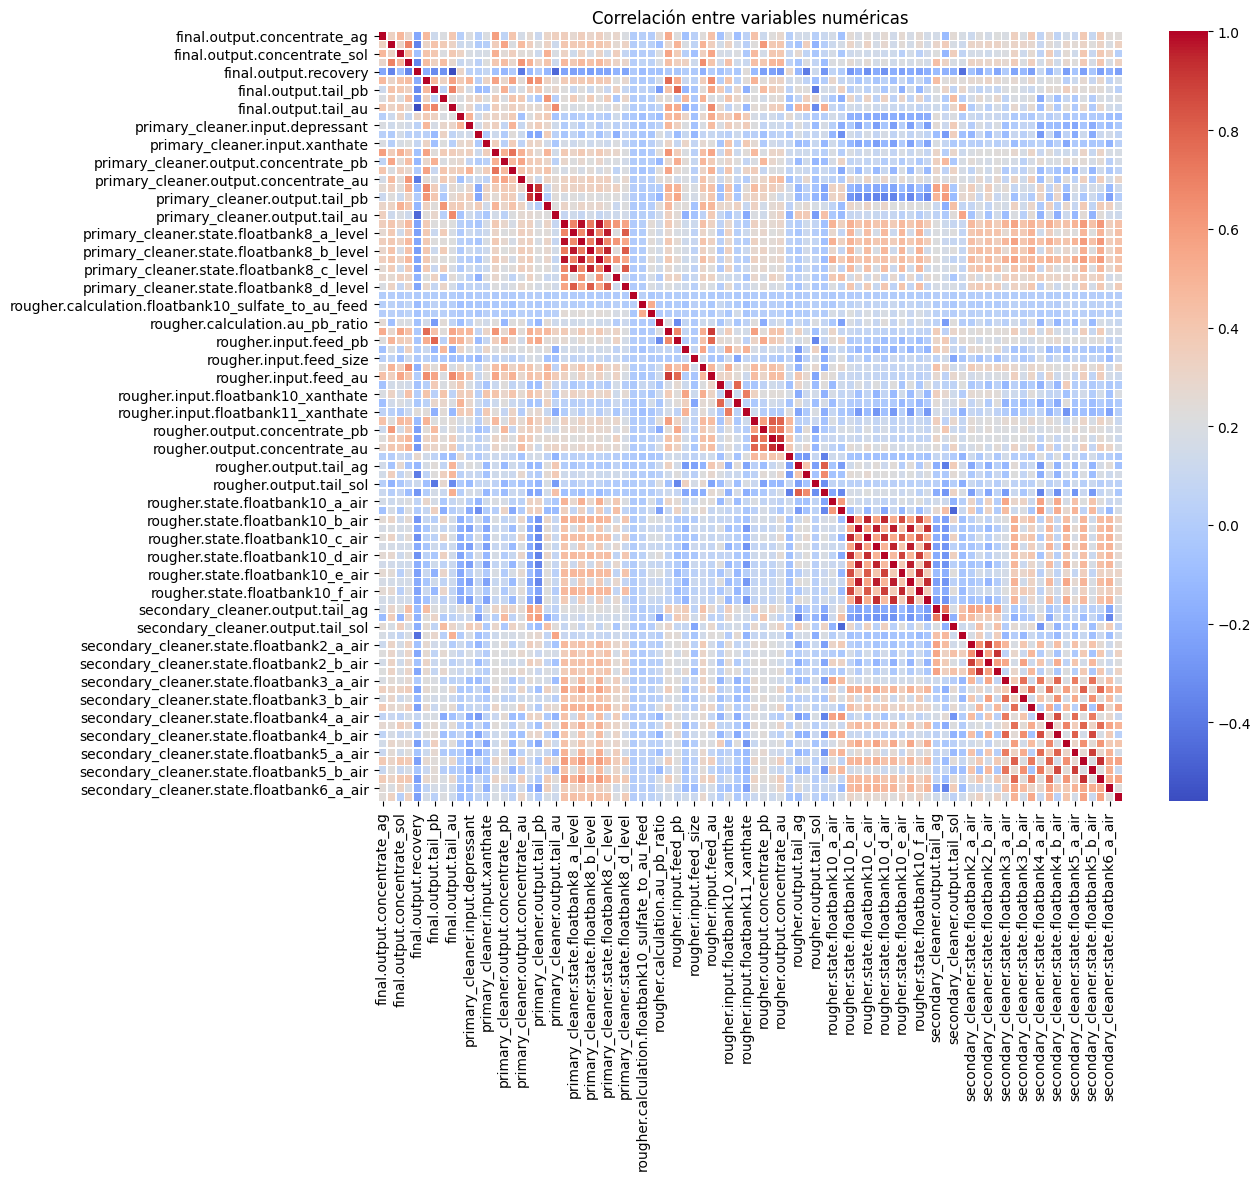

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df_cleaned.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlación entre variables numéricas')
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [17]</b> <a class="tocSkip"></a><br>
La matriz de correlación es una herramienta poderosa para identificar relaciones entre variables. Has hecho un buen trabajo al incluirla, ya que puede ayudar a detectar multicolinealidades que podrían afectar el modelado y la interpretación de los resultados.
</div>


Para entender este diagrama de calor, y a tener presente los valores mas cercanos a 1 y los más negativos para encontrar correlación entre las variables. 
- La correlación entre las variables relacionadas con el aire de los tanques es muy elevada (recuadros con tonos rojos y naranja), al igual que los niveles del tanques. Estas correlaciones elevadas podrían indicar alguna redundancia en el análisis del modelo.
- La variables iniciales también se relacionan entre sí (reflejan la composición del mineral a la entrada) 
- Sin embargo, la mayoría de variables presenta correlaciones ra valores bajos e incluso inversos (colores azul oscuro). Por ejemplo, las variables de salida (concentración y recovery) frente a las corrientes de Tail, es decir, entre más recuperación menos pérdidas en el tail)

Se calcula el mae de recuperación, tanto para la etapa rougher como para el final. En este caso, al ser una operación de división, si es aconsejable determinar que F =! 0, ni que C-T =! 0 ya que daría indeterminado (infinito). A estos casos de indeterminación deben eliminarse para evitar error en el cálculo. 

In [18]:

def calcular_mae_recuperacion(df, etapa):
    if etapa == 'rougher':
        C = df['rougher.output.concentrate_au']
        F = df['rougher.input.feed_au']
        T = df['rougher.output.tail_au']
        recovery_real = df['rougher.output.recovery']
        
    elif etapa == 'final':
        C = df['final.output.concentrate_au']
        F = df['rougher.output.concentrate_au']
        T = df['final.output.tail_au']
        recovery_real = df['final.output.recovery']
        
    else:
        raise ValueError("La etapa debe ser 'rougher' o 'final'")
    
  
    recovery_cal = ((C * (F - T)) / (F * (C - T))) * 100

    # Eliminar posibles NaN o infinitos si quedaran
    valid = ~np.isinf(recovery_cal) & ~np.isnan(recovery_cal)
    mae = np.mean(np.abs(recovery_cal[valid] - recovery_real[valid]))

    print(f"MAE para etapa {etapa}: {mae:.4f}")
    return mae



In [19]:
# Asumiendo que ya trabajás con train_df_cleaned
calcular_mae_recuperacion(train_df_cleaned, 'rougher')
calcular_mae_recuperacion(train_df_cleaned, 'final')


MAE para etapa rougher: 57.4371
MAE para etapa final: 210.6447


210.64472443199955

<div class="alert alert-block alert-warning">
<b>Celda [19]</b> <a class="tocSkip"></a><br>
El cálculo del MAE para las etapas de recuperación es un buen enfoque para evaluar el rendimiento del modelo. Sin embargo, los valores altos de MAE que has obtenido sugieren que podría haber un problema en el modelo o en los datos. Sería beneficioso investigar más a fondo para identificar posibles causas y mejorar la precisión del modelo.
</div>


Se grafican las concentraciones de los elementos en cada una de las etapas: 

In [20]:
df_metales = train_df_cleaned[[
    'rougher.input.feed_au', 'rougher.output.concentrate_au', 'final.output.concentrate_au',
    'rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag',
    'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'final.output.concentrate_pb'
]]

df_long = df_metales.melt(var_name='Etapa_Metal', value_name='Concentración')

df_long[['Etapa', 'Metal']] = df_long['Etapa_Metal'].str.rsplit('_', n=1, expand=True)



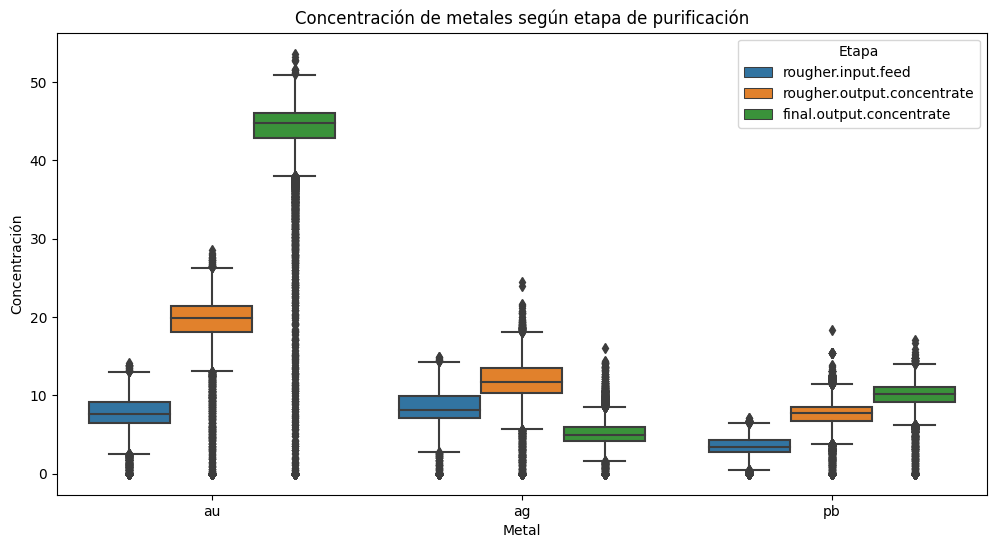

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x='Metal', y='Concentración', hue='Etapa')
plt.title('Concentración de metales según etapa de purificación')
plt.ylabel('Concentración')
plt.show()

La concentración del oro va aumentando en la medida que van pasando los procesos de purificación. El plomo también aumentó su concentración, mientras que la plata se mantuvo en valores menores de 10. 

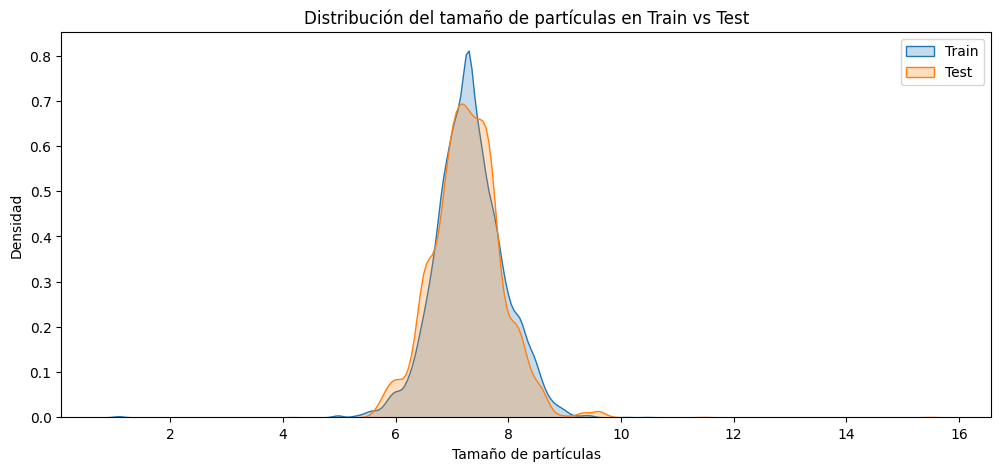

In [22]:
plt.figure(figsize=(12, 5))

sns.kdeplot(train_df_cleaned['primary_cleaner.input.feed_size'].dropna(), label='Train', fill=True)
sns.kdeplot(test_df['primary_cleaner.input.feed_size'].dropna(), label='Test', fill=True)

plt.title('Distribución del tamaño de partículas en Train vs Test')
plt.xlabel('Tamaño de partículas')
plt.ylabel('Densidad')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [22]</b> <a class="tocSkip"></a><br>
La comparación de las distribuciones de tamaño de partículas entre los conjuntos de entrenamiento y prueba es crucial para asegurar que ambos datasets sean comparables. Has hecho un buen trabajo al incluir esta visualización, ya que ayuda a garantizar que el modelo entrenado sea aplicable al conjunto de prueba.
</div>


La distribución de los datos de TRAIN y TEST son similares. Las características de los dataframe tienen valores que siguen patrones estadísticos parecidos y daría tranquilidad al evaluar el modelo. No hay sesgos significativos en los datos y se muestran confiables. No habría la necesidad de borrar elementos (salvo los repetidos que se hizo en el punto anterior). Se calculan las distribuciones por elemento:

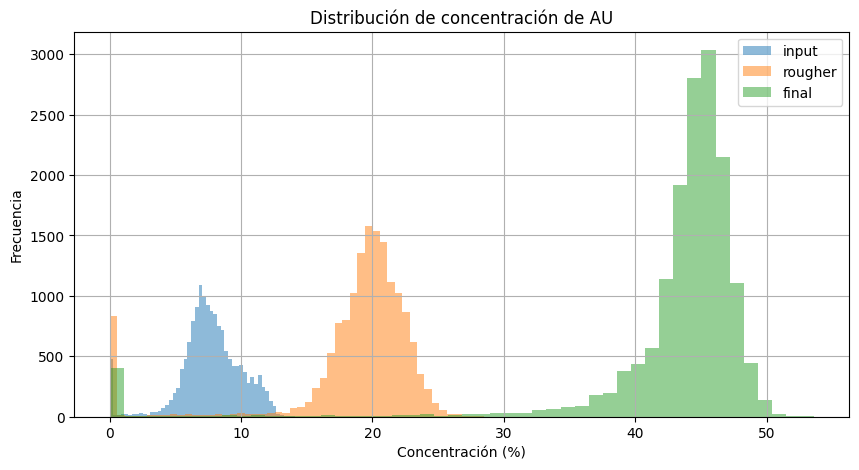

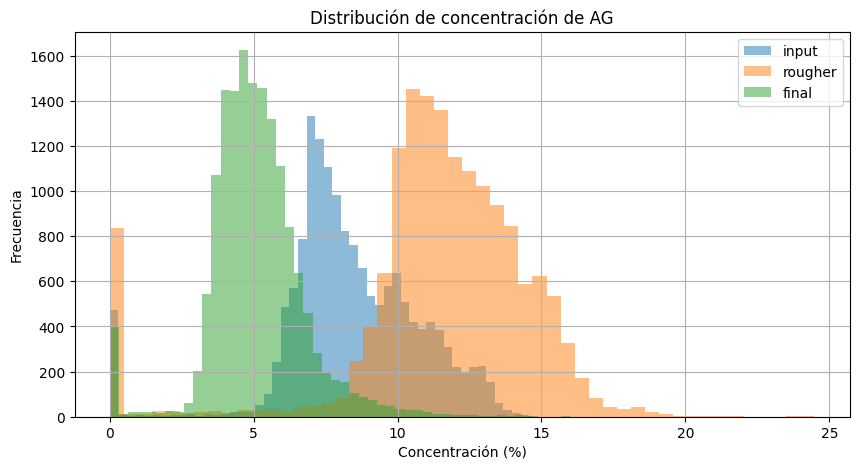

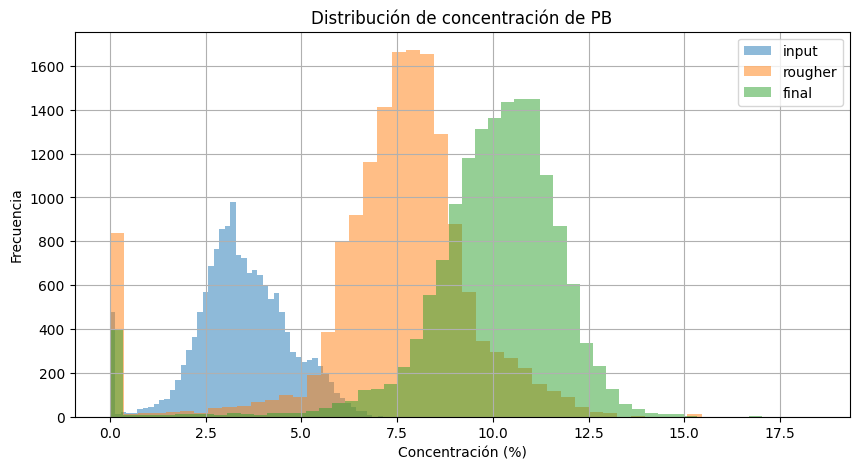

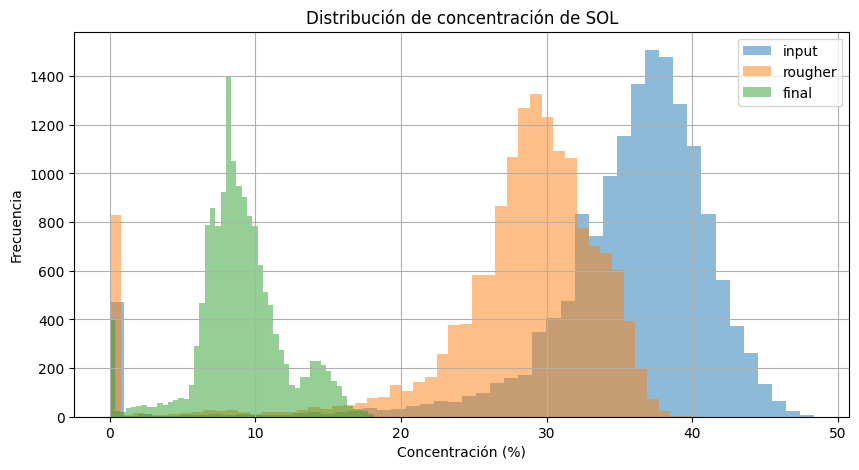

In [23]:
metales = ['au', 'ag', 'pb', 'sol']
etapas = ['input', 'rougher', 'final']

for metal in metales:
    plt.figure(figsize=(10, 5))
    for etapa in etapas:
        col = f'{etapa}.output.concentrate_{metal}' if etapa != 'input' else f'rougher.input.feed_{metal}'
        if col in train_df_cleaned.columns:
            train_df_cleaned[col].hist(alpha=0.5, bins=50, label=etapa)
    plt.title(f'Distribución de concentración de {metal.upper()}')
    plt.xlabel('Concentración (%)')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.show()

In [24]:
metales = ['au', 'ag', 'pb', 'sol']
nombres = {'au': 'Oro (Au)', 'ag': 'Plata (Ag)', 'pb': 'Plomo (Pb)', 'sol': 'Sustancias solubles (Sol)'}
etapas = ['Entrada', 'Rougher', 'Final']
col_etapas = {
    'Entrada': 'rougher.input.feed_{}',
    'Rougher': 'rougher.output.concentrate_{}',
    'Final': 'final.output.concentrate_{}'
}


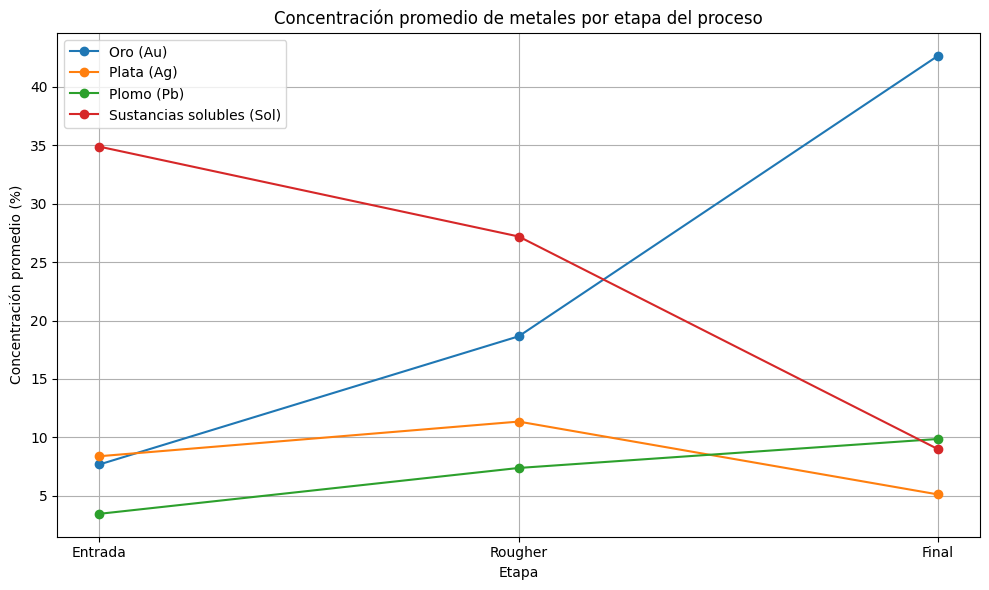

In [25]:

plt.figure(figsize=(10, 6))

for metal in metales:
    valores = []
    for etapa in etapas:
        col = col_etapas[etapa].format(metal)
        if col in train_df_cleaned.columns:
            valores.append(train_df_cleaned[col].mean())
        else:
            valores.append(None)
    
    plt.plot(etapas, valores, marker='o', label=nombres[metal])

plt.title('Concentración promedio de metales por etapa del proceso')
plt.xlabel('Etapa')
plt.ylabel('Concentración promedio (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Las concentraciones promedio en las etapas donde la concentración de sol va disminuyendo en las etapas del proceso; la concentración de plomo aumenta en las etapas, indicando una relación estrecha con la concentración del oro, y la de plata, existe una relación fuerte en las primeras etapas, y ya en la última disminuye. Esto indica que a la salida, el oro tendrá concentraciones de plomo significativas (por los sulfuros). 

# MODELO

Se desarrolla el código para el modelo. Priimero, se realizan funciones para calcular Smape y Smape final

In [26]:
def smape(y_real, y_pred):
    numerator = 2 * np.abs(y_pred - y_real)
    denominator = np.abs(y_real) + np.abs(y_pred)
    
    non_zero = denominator != 0
    smape_value = np.mean(numerator[non_zero] / denominator[non_zero]) * 100
    
    return smape_value


Se van a entrenar 3 modelos: Random Forest, Gradient Boosting y Regresión Lineal. Se extraen solo las columnas que estén en comun en TRAIN y TEST, y se separan las variables objetivo (y_rougher, y_final) y el resto son variables X (features). Adicional se normalizan los datos X. 

In [27]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

X = train_df_cleaned.columns.intersection(test_df.columns)
X_train = train_df_cleaned[X]
y_rougher = train_df_cleaned['rougher.output.recovery']
y_final = train_df_cleaned['final.output.recovery']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df_cleaned[X])



Se evaluará los modelos con una validación cruzada. Se usa el cross_val_score, usando el X_scaled, para la variables objetivos, y usando como métrica de error el sMAPE, donde entre menos, mejor. 

In [28]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    scores_rougher = -cross_val_score(model, X_scaled, y_rougher, cv=cv,
                                      scoring=make_scorer(smape, greater_is_better=False))
    scores_final = -cross_val_score(model, X_scaled, y_final, cv=cv,
                                    scoring=make_scorer(smape, greater_is_better=False))



    avg_rougher = np.mean(scores_rougher)
    avg_final = np.mean(scores_final)
    smape_final = 0.25 * avg_rougher + 0.75 * avg_final

    print(f"Modelo: {name}")
    print(f"  sMAPE Rougher promedio (CV): {avg_rougher:.4f}%")
    print(f"  sMAPE Final promedio (CV):   {avg_final:.4f}%")
    print(f"  sMAPE Final combinado (CV):  {smape_final:.4f}%\n")

    results.append((name, model, smape_final))

Modelo: Linear Regression
  sMAPE Rougher promedio (CV): 9.9906%
  sMAPE Final promedio (CV):   9.1355%
  sMAPE Final combinado (CV):  9.3492%

Modelo: Random Forest
  sMAPE Rougher promedio (CV): 7.7740%
  sMAPE Final promedio (CV):   6.0599%
  sMAPE Final combinado (CV):  6.4884%

Modelo: Gradient Boosting
  sMAPE Rougher promedio (CV): 9.0133%
  sMAPE Final promedio (CV):   7.4511%
  sMAPE Final combinado (CV):  7.8417%



<div class="alert alert-block alert-success">
<b>Celda [28]</b> <a class="tocSkip"></a><br>
Has implementado correctamente la validación cruzada para evaluar los modelos. Esto es esencial para obtener una estimación confiable del rendimiento del modelo y para asegurarte de que el modelo generalice bien a datos no vistos.
</div>


In [29]:
best_name, best_model, best_score = min(results, key=lambda x: x[2])
print(f"Mejor modelo según CV: {best_name} con sMAPE combinado {best_score:.4f}%")


Mejor modelo según CV: Random Forest con sMAPE combinado 6.4884%


Vamos a corroborar valores vacios en el X_scaled y en el TEST que pueden afectar el modelo para la predicción. 

In [30]:
print("NaNs en X_scaled:", np.isnan(X_scaled).sum())
print("Infinitos en X_scaled:", np.isinf(X_scaled).sum())

NaNs en X_scaled: 0
Infinitos en X_scaled: 0


In [31]:
print("NaNs en test_df[X]:", test_df[X].isna().sum().sum())
print("Infinitos en test_df[X]:", np.isinf(test_df[X].values).sum())

NaNs en test_df[X]: 2054
Infinitos en test_df[X]: 0


<div class="alert alert-block alert-warning">
<b>Celda [31]</b> <a class="tocSkip"></a><br>
Has identificado correctamente la presencia de valores NaN en el dataset de prueba. Es importante tratarlos adecuadamente antes de realizar predicciones para evitar errores en el modelo. Asegúrate de aplicar un método de imputación apropiado para mantener la integridad de los datos.
</div>


Para entrenar el modelo TEST, usaremos la media del TRAIN para reemplazar los valores vacíos del TEST, dado que ambas distribuciones de los datos dió muy similiar, gráficamente. 

In [32]:
test_df_filled = test_df.copy()
test_df_filled[X] = test_df[X].fillna(train_df_cleaned[X].mean())

X_test_scaled = scaler.transform(test_df_filled[X])

best_model.fit(X_scaled, y_rougher)
y_rougher_pred_test = best_model.predict(X_test_scaled)

best_model.fit(X_scaled, y_final)
y_final_pred_test = best_model.predict(X_test_scaled)


In [33]:

test_df['rougher.output.recovery_pred'] = y_rougher_pred_test
test_df['final.output.recovery_pred'] = y_final_pred_test

display(test_df[['rougher.output.recovery_pred', 'final.output.recovery_pred']].head())


,rougher.output.recovery_pred,final.output.recovery_pred
date,,
2016-09-01 00:59:59,87.937922,68.975790
2016-09-01 01:59:59,84.810668,69.236856
2016-09-01 02:59:59,80.144276,68.405870
2016-09-01 03:59:59,86.822591,69.941666
2016-09-01 04:59:59,86.972306,68.778531


In [34]:

mean_rougher_pred = test_df['rougher.output.recovery_pred'].mean()
mean_final_pred = test_df['final.output.recovery_pred'].mean()

print(f"Media de recuperación predicha - Rougher: {mean_rougher_pred:.2f}%")
print(f"Media de recuperación predicha - Final: {mean_final_pred:.2f}%")



Media de recuperación predicha - Rougher: 79.95%
Media de recuperación predicha - Final: 67.01%


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Diego! A lo largo del proyecto has demostrado un manejo sólido de varias técnicas importantes:<br><br>• Carga adecuada de los datos con manejo de fechas.<br>• Exploración inicial detallada de los datasets.<br>• Identificación y tratamiento de valores nulos.<br>• Eliminación efectiva de duplicados.<br>• Uso de visualizaciones para entender las distribuciones de datos.<br>• Implementación de una matriz de correlación.<br>• Evaluación del rendimiento del modelo con MAE.<br>• Comparación de distribuciones entre conjuntos de datos.<br>• Aplicación de validación cruzada para modelos.<br>• Detección y manejo de valores NaN en el conjunto de prueba.<br>¡Felicidades!
</div>


No se puede calcular el sMAPE real dado que no se tienen el valores reales de recuperación del data TEST.

# CONCLUSION

Se realizó un análisis de los datos de los 2 dataframe: TRAIN y TEST. Para el TRAIN, se hizo un revisión y limpieza de los datos, para entrenar el modelo. Se usaron 3 modelos, y se evaluaron con la validación cruzada, dando el de bosque el de mejor resultados. Y con ese modelo, se predijeron recuperaciones según la información del TEST, dando promedios de ROUGHER de 80% y FINAL de 67%. 